# Spark

Apache Spark — это мощная и гибкая система для обработки больших объемов данных, предлагающая широкий спектр возможностей для аналитики и машинного обучения. 

In [1]:
import os
import socket
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.sql.functions import udf, col, desc, rank, row_number

In [2]:
print('user:', os.environ['JUPYTERHUB_SERVICE_PREFIX'])

def uiWebUrl(self):
    from urllib.parse import urlparse
    web_url = self._jsc.sc().uiWebUrl().get()
    port = urlparse(web_url).port
    return '{}proxy/{}/jobs/'.format(os.environ['JUPYTERHUB_SERVICE_PREFIX'], port)

SparkContext.uiWebUrl = property(uiWebUrl)

conf = SparkConf().set('spark.master', 'local[*]').set('spark.driver.memory', '4g')
sc = SparkContext(conf=conf)
spark = SparkSession(sc)
spark

user: /user/lion1867/


In [3]:
sdf = spark.read.csv(
    'datasets/aggrigation_logs_per_week.csv', 
    sep=',', 
    header=True
)
sdf.printSchema()

root
 |-- courseid: string (nullable = true)
 |-- userid: string (nullable = true)
 |-- num_week: string (nullable = true)
 |-- s_all: string (nullable = true)
 |-- s_all_avg: string (nullable = true)
 |-- s_course_viewed: string (nullable = true)
 |-- s_course_viewed_avg: string (nullable = true)
 |-- s_q_attempt_viewed: string (nullable = true)
 |-- s_q_attempt_viewed_avg: string (nullable = true)
 |-- s_a_course_module_viewed: string (nullable = true)
 |-- s_a_course_module_viewed_avg: string (nullable = true)
 |-- s_a_submission_status_viewed: string (nullable = true)
 |-- s_a_submission_status_viewed_avg: string (nullable = true)
 |-- NameR_Level: string (nullable = true)
 |-- Name_vAtt: string (nullable = true)
 |-- Depart: string (nullable = true)
 |-- Name_OsnO: string (nullable = true)
 |-- Name_FormOPril: string (nullable = true)
 |-- LevelEd: string (nullable = true)
 |-- Num_Sem: string (nullable = true)
 |-- Kurs: string (nullable = true)
 |-- Date_vAtt: string (nullable =

Выведем  первые пять записей из Spark DataFrame

In [4]:
sdf.limit(5).toPandas().head()

,courseid,userid,num_week,s_all,s_all_avg,s_course_viewed,s_course_viewed_avg,s_q_attempt_viewed,s_q_attempt_viewed_avg,s_a_course_module_viewed,...,s_a_submission_status_viewed_avg,NameR_Level,Name_vAtt,Depart,Name_OsnO,Name_FormOPril,LevelEd,Num_Sem,Kurs,Date_vAtt
0,71262,34527,6,9,9,4,4,0,0,0,...,0,3,Экзамен,22,1,1,1,2,2,18.06.2022
1,71262,34527,7,0,"4,5",0,2,0,0,0,...,0,3,Экзамен,22,1,1,1,2,2,18.06.2022
2,71262,34527,8,0,3,0,"1,3333",0,0,0,...,0,3,Экзамен,22,1,1,1,2,2,18.06.2022
3,71262,34527,9,0,"2,25",0,1,0,0,0,...,0,3,Экзамен,22,1,1,1,2,2,18.06.2022
4,71262,34527,10,0,"1,8",0,"0,8",0,0,0,...,0,3,Экзамен,22,1,1,1,2,2,18.06.2022


In [5]:
print('Количество записей в наборе данных:', sdf.count())

Количество записей в наборе данных: 414528


In [10]:
sdf.orderBy('s_course_viewed').limit(5).toPandas()

,courseid,userid,num_week,s_all,s_all_avg,s_course_viewed,s_course_viewed_avg,s_q_attempt_viewed,s_q_attempt_viewed_avg,s_a_course_module_viewed,...,s_a_submission_status_viewed_avg,NameR_Level,Name_vAtt,Depart,Name_OsnO,Name_FormOPril,LevelEd,Num_Sem,Kurs,Date_vAtt
0,84236,33622,25,0,"23,1",0,"4,2",0,"3,05",0,...,"3,75",4,Экзамен,23,1,1,1,2,2,23.06.2022
1,71262,34527,10,0,"1,8",0,"0,8",0,0,0,...,0,3,Экзамен,22,1,1,1,2,2,18.06.2022
2,75656,29359,28,0,"0,2174",0,"0,1304",0,0,0,...,"0,0435",2,Экзамен,12,1,1,2,4,3,17.06.2022
3,71262,34527,12,0,"1,4286",0,"0,7143",0,0,0,...,0,3,Экзамен,22,1,1,1,2,2,18.06.2022
4,84236,33622,26,0,22,0,4,0,"2,9048",0,...,"3,5714",4,Экзамен,23,1,1,1,2,2,23.06.2022


In [11]:
sdf.select('Name_vAtt').distinct().show()

+---------+
|Name_vAtt|
+---------+
|  Экзамен|
+---------+



Группировка данных, подсчет частоты появления

In [12]:
sdf.groupby('userid').count().show()

+------+-----+
|userid|count|
+------+-----+
| 35444|   72|
| 34657|   96|
| 29089|   48|
| 29573|   48|
| 30966|   24|
| 35350|   96|
| 29539|   72|
| 21783|   72|
| 24269|   72|
| 22121|   48|
|  5613|   48|
| 24528|   48|
| 27492|   48|
| 15539|   24|
| 24078|   24|
| 25350|   48|
| 30054|   24|
| 35438|   72|
| 27753|   72|
| 27563|   96|
+------+-----+
only showing top 20 rows



In [13]:
sdf.groupby('userid').count().sort(col('count').desc()).show()

+------+-----+
|userid|count|
+------+-----+
| 33470|  120|
| 33541|  120|
| 33528|  120|
| 20252|  120|
| 24347|  120|
| 33864|  120|
| 20734|  120|
| 24631|  120|
| 34345|  120|
| 25123|  120|
| 25267|  120|
| 30067|  120|
| 34186|  120|
| 33583|  120|
| 36019|  120|
| 36001|  120|
| 24710|  120|
| 33685|  120|
| 33463|  120|
| 35787|  120|
+------+-----+
only showing top 20 rows



Фильтрация данных

In [14]:
sdf.select(
    'userid',
    'num_week',
    'courseid',
    's_course_viewed'
).filter(
    (col('userid') == '33470') & (col('courseid') == '74257')
).limit(
    30
).toPandas()

,userid,num_week,courseid,s_course_viewed
0,33470,6,74257,5
1,33470,7,74257,0
2,33470,8,74257,12
3,33470,9,74257,4
4,33470,10,74257,0
5,33470,11,74257,14
6,33470,12,74257,5
7,33470,13,74257,5
8,33470,14,74257,2
9,33470,15,74257,8


## Задание 1:
### Анализ активности студентов на портале
Рассчитать общее количество событий (s_all) и просмотров курсов (s_course_viewed) по каждой неделе (num_week).

Примечание. Используйте методы groupBy + agg. 

Проанализируйте полученные данные, какие выводы можно сделать?

In [17]:
from pyspark.sql.functions import sum as spark_sum

# Агрегируем данные
aggregated_data = sdf.groupBy("num_week").agg(
    spark_sum("s_all").alias("total_s_all"),  # Используем spark_sum
    spark_sum("s_course_viewed").alias("total_s_course_viewed")
)

# Добавляем расчет доли просмотров курсов
aggregated_data_with_ratio = aggregated_data.withColumn(
    "course_view_ratio", 
    col("total_s_course_viewed") / col("total_s_all")
)

# Сортируем данные по num_week
sorted_data = aggregated_data_with_ratio.orderBy("num_week")

# Показываем результат
sorted_data.show()

+--------+-----------+---------------------+-------------------+
|num_week|total_s_all|total_s_course_viewed|  course_view_ratio|
+--------+-----------+---------------------+-------------------+
|      10|   141778.0|              33449.0| 0.2359251788006602|
|      11|   173100.0|              39493.0| 0.2281513575967649|
|      12|   162041.0|              37901.0| 0.2338975938188483|
|      13|   172962.0|              38890.0|0.22484707623639874|
|      14|   170305.0|              37556.0| 0.2205220046387364|
|      15|   178829.0|              39322.0|0.21988603638112386|
|      16|   177650.0|              38385.0|0.21607092597804672|
|      17|   181629.0|              37328.0| 0.2055178413138871|
|      18|   167044.0|              34461.0|0.20629893920164746|
|      19|   191952.0|              40742.0|0.21225097941151955|
|      20|   249532.0|              52905.0|0.21201689562861678|
|      21|   319598.0|              64802.0|0.20276096846663622|
|      22|   388401.0|   

## Задание 2.
### Определение самых популярных курсов

Найти топ-5 курсов (courseid) по среднему количеству просмотров (s_course_viewed_avg).


In [19]:
from pyspark.sql.functions import avg

# Группируем данные по courseid и вычисляем среднее количество просмотров
course_avg_views = sdf.groupBy("courseid").agg(
    avg("s_course_viewed").alias("s_course_viewed_avg")
)

# Сортируем курсы по убыванию среднего количества просмотров
top_courses = course_avg_views.orderBy(col("s_course_viewed_avg").desc())

# Выбираем топ-5 курсов
top_5_courses = top_courses.limit(5)

# Показываем результат
top_5_courses.show()

+--------+-------------------+
|courseid|s_course_viewed_avg|
+--------+-------------------+
|   76419| 26.473577235772357|
|   78733| 17.930555555555557|
|   78705| 16.133333333333333|
|   82552| 14.083333333333334|
|   73823|  13.90798611111111|
+--------+-------------------+



## Задание 3: 
### Мини-исследование

Определить: имеется ли связь между количеством просмотров студентов отдельных курсов и количеством студентов, изучающих отдельный курс.



In [23]:
# Преобразуем userid в строку (если необходимо)
sdf = sdf.withColumn("userid", col("userid").cast("string"))

# Группируем данные по courseid и вычисляем метрики
course_metrics = sdf.groupBy("courseid").agg(
    spark_sum("s_course_viewed").alias("total_views"),  # Общее количество просмотров
    countDistinct("userid").alias("unique_students")    # Количество уникальных студентов
)

# Преобразуем unique_students в целое число (если необходимо)
course_metrics = course_metrics.withColumn("unique_students", col("unique_students").cast("int"))

# Показываем результат
course_metrics.show()

# Вычисляем корреляцию между total_views и unique_students
correlation = course_metrics.corr("total_views", "unique_students")
print(f"Коэффициент корреляции: {correlation}")

+--------+-----------+---------------+
|courseid|total_views|unique_students|
+--------+-----------+---------------+
|   72175|     2798.0|       38643216|
|   72314|     6187.0|       18335832|
|   73414|      270.0|        7818384|
|   73555|      162.0|        6117888|
|   72064|       71.0|        2587704|
|   73043|     3418.0|        7845792|
|   73086|     1258.0|        7399680|
|   71885|      596.0|        6953832|
|   75140|      700.0|       10961016|
|   73731|      914.0|       18737640|
|   71545|     2093.0|       25119336|
|   72811|       28.0|       13006848|
|   74967|       57.0|        7305480|
|   75638|     3277.0|       10511064|
|   71892|     5781.0|       92934720|
|   73986|     4516.0|       13894656|
|   71730|      313.0|       19607808|
|   75653|      651.0|       11117760|
|   72666|     1117.0|       12760464|
|   72714|     2550.0|        6743304|
+--------+-----------+---------------+
only showing top 20 rows

Коэффициент корреляции: 0.488262164474

## Задание 4. 
### Сравнение активности студентов на бюджете и контракте

Найти разницу в среднем количестве всех событий (s_all_avg) между студентами на бюджете и контракте (name_osno). 

Какие выводы можно сделать?



In [27]:
# Проверяем уникальные значения в столбце name_osno
sdf.select("name_osno").distinct().show()

# Группируем данные по name_osno и вычисляем среднее количество событий
activity_by_group = sdf.groupBy("name_osno").agg(
    avg("s_all").alias("s_all_avg")  # Среднее количество всех событий
)

# Показываем результат
activity_by_group.show()

+---------+
|name_osno|
+---------+
|        1|
|        2|
+---------+

+---------+------------------+
|name_osno|         s_all_avg|
+---------+------------------+
|        1|11.676459525536659|
|        2|10.042557382665297|
+---------+------------------+



In [28]:
budget_activity = activity_by_group.filter(col("name_osno") == 1).select("s_all_avg").first()[0]
contract_activity = activity_by_group.filter(col("name_osno") == 2).select("s_all_avg").first()[0]

difference = budget_activity - contract_activity
print(f"Разница в среднем количестве событий: {difference}")

Разница в среднем количестве событий: 1.6339021428713618


Студенты на бюджете более активны, чем студенты на контракте.

## Задание 5.
### Исследование зависимости активности студентов от формы обучения

Определить, как форма обучения (name_formopril) влияет на активность студентов (s_all_avg)?



Уникальные формы обучения:
+--------------+
|name_formopril|
+--------------+
|             3|
|             1|
|             2|
+--------------+

Средняя активность по формам обучения:
+--------------+------------------+
|name_formopril|         s_all_avg|
+--------------+------------------+
|             3|3.6041666666666665|
|             1|13.850071894308249|
|             2| 5.688973292337373|
+--------------+------------------+



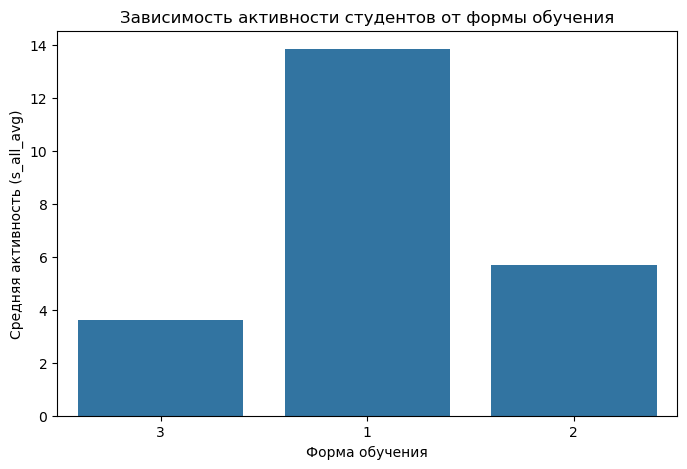

In [29]:
# Проверяем уникальные значения в столбце name_formopril
unique_forms = sdf.select("name_formopril").distinct()
print("Уникальные формы обучения:")
unique_forms.show()

# Группируем данные по name_formopril и вычисляем среднее количество событий
activity_by_form = sdf.groupBy("name_formopril").agg(
    avg("s_all").alias("s_all_avg")  # Среднее количество всех событий
)

# Показываем результат
print("Средняя активность по формам обучения:")
activity_by_form.show()

# Преобразуем данные в Pandas для дальнейшего анализа (опционально)
pandas_df = activity_by_form.toPandas()

# Визуализация данных (опционально)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(data=pandas_df, x="name_formopril", y="s_all_avg")
plt.title("Зависимость активности студентов от формы обучения")
plt.xlabel("Форма обучения")
plt.ylabel("Средняя активность (s_all_avg)")
plt.show()

## Задание 6. 
### Выявление активности студентов по семестрам

Определить, в каком семестре (num_sem) студенты проявляют наибольшую активность (по s_all_avg).



Средняя активность по семестрам:
+-------+------------------+
|num_sem|         s_all_avg|
+-------+------------------+
|      2|14.744594017094018|
|      8|10.983744855967078|
|      4| 9.627774755168662|
|      6| 9.134338574669483|
|     10| 4.549393583724569|
|     12|1.1289855072463768|
+-------+------------------+

Семестр с максимальной активностью: 2 (средняя активность: 14.744594017094018)


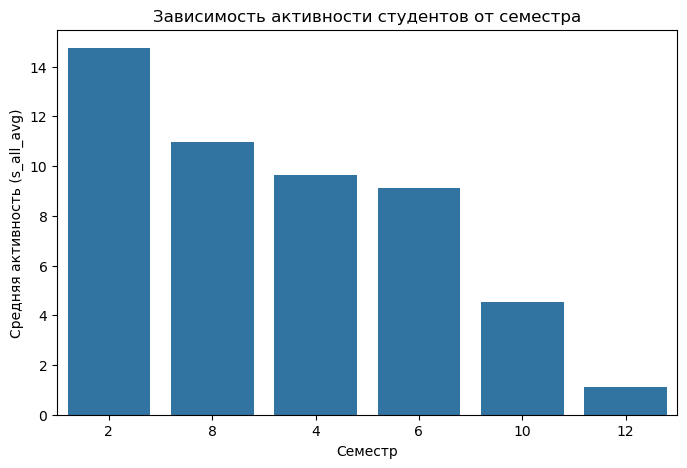

In [30]:
# Группируем данные по num_sem и вычисляем среднее количество событий
activity_by_semester = sdf.groupBy("num_sem").agg(
    avg("s_all").alias("s_all_avg")  # Среднее количество всех событий
)

# Сортируем данные по убыванию средней активности
sorted_activity = activity_by_semester.orderBy(col("s_all_avg").desc())

# Показываем результат
print("Средняя активность по семестрам:")
sorted_activity.show()

# Находим семестр с максимальной активностью
most_active_semester = sorted_activity.first()
print(f"Семестр с максимальной активностью: {most_active_semester['num_sem']} (средняя активность: {most_active_semester['s_all_avg']})")

# Преобразуем данные в Pandas для дальнейшего анализа (опционально)
pandas_df = sorted_activity.toPandas()

# Визуализация данных (опционально)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(data=pandas_df, x="num_sem", y="s_all_avg")
plt.title("Зависимость активности студентов от семестра")
plt.xlabel("Семестр")
plt.ylabel("Средняя активность (s_all_avg)")
plt.show()

## Задание 7.
### Определение кафедр с наибольшей активностью студентов

Найти топ-3 кафедры (depart), где студенты наиболее активны (по s_all_avg).



Топ-3 кафедры с наибольшей активностью:
+------+------------------+
|depart|         s_all_avg|
+------+------------------+
|    24| 30.44964405360134|
|     4|28.884272997032642|
|    41|23.020875251509054|
+------+------------------+



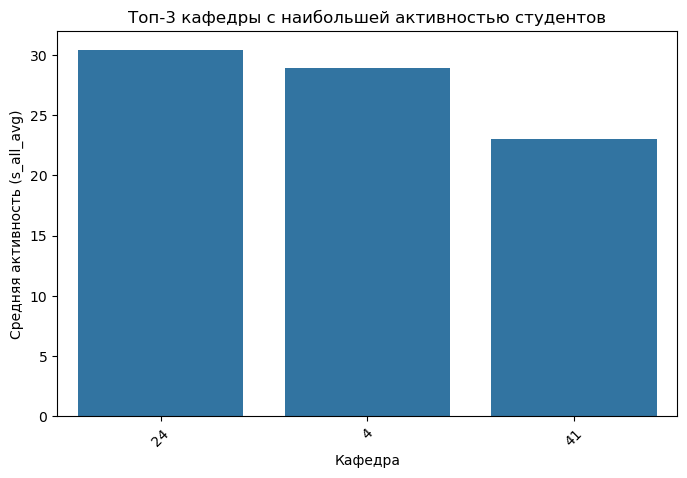

In [31]:
# Группируем данные по depart и вычисляем среднее количество событий
activity_by_department = sdf.groupBy("depart").agg(
    avg("s_all").alias("s_all_avg")  # Среднее количество всех событий
)

# Сортируем данные по убыванию средней активности
sorted_activity = activity_by_department.orderBy(col("s_all_avg").desc())

# Выбираем топ-3 кафедры
top_3_departments = sorted_activity.limit(3)

# Показываем результат
print("Топ-3 кафедры с наибольшей активностью:")
top_3_departments.show()

# Преобразуем данные в Pandas для дальнейшего анализа (опционально)
pandas_df = top_3_departments.toPandas()

# Визуализация данных (опционально)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(data=pandas_df, x="depart", y="s_all_avg")
plt.title("Топ-3 кафедры с наибольшей активностью студентов")
plt.xlabel("Кафедра")
plt.ylabel("Средняя активность (s_all_avg)")
plt.xticks(rotation=45)  # Поворот подписей по оси X для удобства чтения
plt.show()

## Задание 8. 
### Анализ успеваемости студентов в зависимости от активности

Найти среднюю оценку (namer_level) для студентов с разной активностью (s_all_avg).



Средняя оценка для разных уровней активности:
+------------------+-------------------+
|    activity_group|average_namer_level|
+------------------+-------------------+
| Низкая активность| 3.7555236931177136|
|Средняя активность|  4.188619180262634|
|Высокая активность| 4.3469935293808195|
+------------------+-------------------+



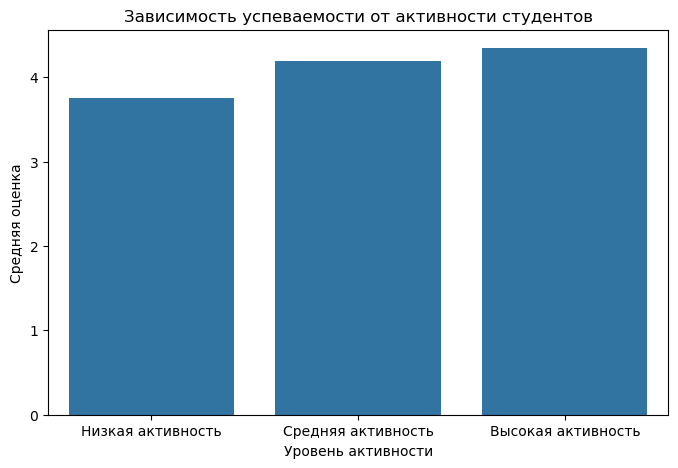

In [33]:
from pyspark.sql.functions import col, avg, when

# Преобразуем столбцы в числовой тип
sdf = sdf.withColumn("s_all_avg", col("s_all_avg").cast("float"))
sdf = sdf.withColumn("namer_level", col("namer_level").cast("float"))

# Исключаем строки с пропущенными значениями
sdf = sdf.filter(col("s_all_avg").isNotNull() & col("namer_level").isNotNull())

# Делим студентов на группы по активности
activity_groups = sdf.withColumn(
    "activity_group",
    when(col("s_all_avg") < 5, "Низкая активность")
    .when((col("s_all_avg") >= 5) & (col("s_all_avg") < 10), "Средняя активность")
    .otherwise("Высокая активность")
)

# Группируем данные по activity_group и вычисляем среднюю оценку
performance_by_activity = activity_groups.groupBy("activity_group").agg(
    avg("namer_level").alias("average_namer_level")  # Средняя оценка
)

# Сортируем данные по возрастанию активности
sorted_performance = performance_by_activity.orderBy(
    when(col("activity_group") == "Низкая активность", 1)
    .when(col("activity_group") == "Средняя активность", 2)
    .otherwise(3)
)

# Показываем результат
print("Средняя оценка для разных уровней активности:")
sorted_performance.show()

pandas_df = sorted_performance.toPandas()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(data=pandas_df, x="activity_group", y="average_namer_level")
plt.title("Зависимость успеваемости от активности студентов")
plt.xlabel("Уровень активности")
plt.ylabel("Средняя оценка")
plt.show()

## Задание 9.
### Выявление студентов с аномально низкой активностью
Найти студентов с количеством событий (s_all_avg) ниже среднего по курсу (kurs).

Подсказка: Используйте window functions. 
`````
from pyspark.sql.window import Window
from pyspark.sql.functions import mean
`````

In [5]:
from pyspark.sql.window import Window
from pyspark.sql.functions import mean

# Преобразуем столбцы в числовой тип
sdf = sdf.withColumn("s_all_avg", col("s_all_avg").cast("float"))
sdf = sdf.withColumn("kurs", col("kurs").cast("int"))

# Исключаем строки с пропущенными значениями
sdf = sdf.filter(col("s_all_avg").isNotNull() & col("kurs").isNotNull())

aggregated_data = sdf.groupBy("userid", "kurs").agg(
    mean("s_all_avg").alias("avg_s_all")
)

# Создаем окно для группировки по курсу
window_spec = Window.partitionBy("kurs")

# Добавляем столбец со средней активностью по курсу
sdf_with_avg = sdf.withColumn(
    "avg_s_all_by_kurs",
    mean("s_all_avg").over(window_spec)
)


threshold = 0.5
low_activity_students = sdf_with_avg.filter(
    col("s_all_avg") < col("avg_s_all_by_kurs") * threshold
)

# Показываем результат
print("Студенты с аномально низкой активностью:")
low_activity_students.select("userid", "kurs", "s_all_avg", "avg_s_all_by_kurs").show()

Студенты с аномально низкой активностью:
+------+----+---------+-----------------+
|userid|kurs|s_all_avg|avg_s_all_by_kurs|
+------+----+---------+-----------------+
| 34527|   2|      3.0|9.363531867267612|
| 34527|   2|      1.0|9.363531867267612|
| 34609|   2|      1.0|9.363531867267612|
| 34609|   2|      1.0|9.363531867267612|
| 34610|   2|      4.0|9.363531867267612|
| 34610|   2|      2.0|9.363531867267612|
| 34610|   2|      2.0|9.363531867267612|
| 34611|   2|      4.0|9.363531867267612|
| 34611|   2|      3.0|9.363531867267612|
| 34611|   2|      2.0|9.363531867267612|
| 34611|   2|      1.0|9.363531867267612|
| 34612|   2|      4.0|9.363531867267612|
| 34612|   2|      3.0|9.363531867267612|
| 34613|   2|      3.0|9.363531867267612|
| 34613|   2|      2.0|9.363531867267612|
| 34615|   2|      3.0|9.363531867267612|
| 34615|   2|      1.0|9.363531867267612|
| 34616|   2|      3.0|9.363531867267612|
| 34616|   2|      1.0|9.363531867267612|
| 34618|   2|      3.0|9.3635318672

In [6]:
# Преобразуем столбцы в числовой тип
sdf = sdf.withColumn("s_all_avg", col("s_all_avg").cast("float"))
sdf = sdf.withColumn("kurs", col("kurs").cast("int"))

# Исключаем строки с пропущенными значениями
sdf = sdf.filter(col("s_all_avg").isNotNull() & col("kurs").isNotNull())

# Агрегируем данные: вычисляем среднюю активность для каждого студента на каждом курсе
aggregated_data = sdf.groupBy("userid", "kurs").agg(
    mean("s_all_avg").alias("avg_s_all")
)

# Создаем окно для группировки по курсу
window_spec = Window.partitionBy("kurs")

# Добавляем столбец со средней активностью по курсу
data_with_avg = aggregated_data.withColumn(
    "avg_s_all_by_kurs",
    mean("avg_s_all").over(window_spec)
)

# Вводим порог: активность значительно ниже средней (например, на 50%)
threshold = 0.5

# Фильтруем студентов с активностью ниже средней по курсу
low_activity_students = data_with_avg.filter(
    col("avg_s_all") < col("avg_s_all_by_kurs") * threshold
)

# Показываем результат
print("Студенты с аномально низкой активностью:")
low_activity_students.select("userid", "kurs", "avg_s_all", "avg_s_all_by_kurs").show()

Студенты с аномально низкой активностью:
+------+----+--------------------+------------------+
|userid|kurs|           avg_s_all| avg_s_all_by_kurs|
+------+----+--------------------+------------------+
| 34647|   2|                 0.0|12.279773140694227|
| 33670|   2|  3.2857142857142856|12.279773140694227|
| 35392|   2|               2.875|12.279773140694227|
| 35773|   2|  0.2222222222222222|12.279773140694227|
| 34197|   2|  1.5789473684210527|12.279773140694227|
| 34275|   2|                 1.0|12.279773140694227|
| 35897|   2|                 0.0|12.279773140694227|
| 35474|   2|                 1.8|12.279773140694227|
| 34690|   2|0.034482758620689655|12.279773140694227|
| 37150|   2|   1.032258064516129|12.279773140694227|
| 36018|   2|   4.222222222222222|12.279773140694227|
| 36564|   2|                 0.0|12.279773140694227|
| 35042|   2|   5.888888888888889|12.279773140694227|
| 33540|   2|   5.947368421052632|12.279773140694227|
| 33983|   2|   4.105263157894737|12.2797

In [52]:
sdf_with_avg

DataFrame[courseid: string, userid: string, num_week: string, s_all: string, s_all_avg: float, s_course_viewed: string, s_course_viewed_avg: string, s_q_attempt_viewed: string, s_q_attempt_viewed_avg: string, s_a_course_module_viewed: string, s_a_course_module_viewed_avg: string, s_a_submission_status_viewed: string, s_a_submission_status_viewed_avg: string, NameR_Level: string, Name_vAtt: string, Depart: string, Name_OsnO: string, Name_FormOPril: string, LevelEd: string, Num_Sem: string, kurs: int, Date_vAtt: string, avg_s_all_by_kurs: double]

## Задание 10.
### Кластеризация студентов по активности 

Разделить студентов на 3 группы (низкая, средняя, высокая активность) с помощью K-Means.

Примечание.  Используйте KMeans из pyspark.ml.clustering. 
Обратите внимание, что по каждому студенту в наборе данных представлены логи, поэтому прежде чем проводить кластеризацию нужно сначала  провести агрегацию данных для каждого студента.

In [47]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.clustering import KMeans

# Преобразуем столбцы в числовой тип
sdf = sdf.withColumn("s_all_avg", col("s_all_avg").cast("float"))
sdf = sdf.withColumn("userid", col("userid").cast("int"))

# Исключаем строки с пропущенными значениями
sdf = sdf.filter(col("s_all_avg").isNotNull() & col("userid").isNotNull())

# Агрегируем данные: вычисляем среднее значение s_all_avg для каждого студента
aggregated_data = sdf.groupBy("userid").agg(
    avg("s_all_avg").alias("avg_s_all")
)

# Преобразуем данные в векторный формат
vector_assembler = VectorAssembler(inputCols=["avg_s_all"], outputCol="features")
data_with_features = vector_assembler.transform(aggregated_data)

# Применяем K-Means для разделения студентов на 3 кластера
kmeans = KMeans(k=3, seed=42)
model = kmeans.fit(data_with_features)

# Добавляем предсказания к данным
clustered_data = model.transform(data_with_features)

# Показываем результат
print("Студенты и их кластеры:")
clustered_data.select("userid", "avg_s_all", "prediction").show()

# Выводим центры кластеров
centers = model.clusterCenters()
print("Центры кластеров:")
for i, center in enumerate(centers):
    print(f"Кластер {i}: {center[0]}")

Студенты и их кластеры:
+------+-------------------+----------+
|userid|          avg_s_all|prediction|
+------+-------------------+----------+
| 33412| 56.888888888888886|         0|
| 29054|               20.0|         2|
| 29719|  54.55555555555556|         0|
| 29834|              17.88|         2|
| 26755| 1.7777777777777777|         1|
| 34234|               36.5|         2|
| 27760|                0.0|         1|
| 37146|                0.0|         1|
| 32414| 0.2413793103448276|         1|
| 29601|  7.923076923076923|         1|
| 29814|              10.75|         1|
| 25517| 1.0869565217391304|         1|
| 28024| 2.1666666666666665|         1|
| 36131| 23.555555555555557|         2|
| 24354| 10.636363636363637|         1|
| 33717|                5.0|         1|
| 33722|               18.0|         2|
| 26706|                0.0|         1|
| 23571|0.09090909090909091|         1|
| 26708|                4.4|         1|
+------+-------------------+----------+
only showing top